### 4 - Linear Regression

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [2]:
base_dir = os.path.join('',Path(os.getcwd()).parents[0])
data_dir = os.path.join(base_dir, 'Data')

In [3]:
schools = pd.read_csv(data_dir+'/caschool.csv')
schools.head()

Observation Number  dist_cod   county                         district  \
0                   1     75119  Alameda               Sunol Glen Unified   
1                   2     61499    Butte             Manzanita Elementary   
2                   3     61549    Butte      Thermalito Union Elementary   
3                   4     61457    Butte  Golden Feather Union Elementary   
4                   5     61523    Butte         Palermo Union Elementary   

  gr_span  enrl_tot   teachers   calw_pct   meal_pct  computer     testscr  \
0   KK-08       195  10.900000   0.510200   2.040800        67  690.799988   
1   KK-08       240  11.150000  15.416700  47.916698       101  661.200012   
2   KK-08      1550  82.900002  55.032299  76.322601       169  643.599976   
3   KK-08       243  14.000000  36.475399  77.049202        85  647.700012   
4   KK-08      1335  71.500000  33.108601  78.427002       171  640.849976   

   comp_stu     expn_stu        str     avginc     el_pct    read_scr  \
0  0.343590  6384.911133  17.889910  22.690001   0.000000  691.599976   
1  0.420833  5099.380859  21.524664   9.824000   4.583333  660.500000   
2  0.109032  5501.954590  18.697226   8.978000  30.000002  636.299988   
3  0.349794  7101.831055  17.357143   8.978000   0.000000  651.900024   
4  0.128090  5235.987793  18.671329   9.080333  13.857677  641.799988   

     math_scr  
0  690.000000  
1  661.900024  
2  650.900024  
3  643.500000  
4  639.900024

**4.1 Simple Regression Models**

In [4]:
simple = ols('testscr ~ str', data = schools).fit() # Assuming homoscedasticity
print(simple.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           2.78e-06
Time:                        02:55:31   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9330      9.467     73.825      0.0

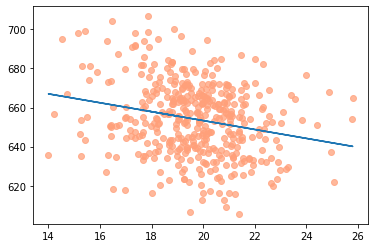

698.9329523451205
-2.2798082878976227


In [5]:
b, a = np.polyfit(schools.str, schools.testscr, 1)
line_reg = [b*i + a for i in schools.str]
reg = 'y = {}x + {}'
plt.scatter(x='str', y='testscr',data=schools,color='lightsalmon',alpha=0.75)

plt.plot(schools.str, line_reg, label=reg.format(b.round(2),a.round(2)))
plt.show()
print(a)
print(b)

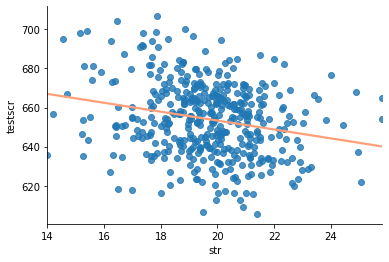

In [6]:
sns.regplot(x='str', y='testscr', data = schools,ci=False,line_kws = {'color':'lightsalmon'})
plt.xlabel('str')
plt.ylabel('testscr')
sns.despine()

plt.show()

In [7]:
b,a,r_value,p_value,std_err = stats.linregress(x=schools.str,y=schools.testscr)
rsq =r_value**2
print('b = {}'.format(b.round(2)))
print('a = {}'.format(a.round(2)))
print('r2 = {}'.format(rsq.round(3)))
print('std_b = {}'.format(std_err.round(5)))
print('pvalue = {}'.format(p_value.round(2)))

b = -2.28
a = 698.93
r2 = 0.051
std_b = 0.47983
pvalue = 0.0


In [8]:
simple = ols('testscr ~ str',data = schools).fit(cov_type='HC3') # Assuming heteroskedasticity
print(simple.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     18.90
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           1.73e-05
Time:                        02:55:33   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9330     10.461     66.816      0.0

**4.2 Testing Heteroskedasticity through statistical tests** - https://medium.com/@remycanario17/tests-for-heteroskedasticity-in-python-208a0fdb04ab

*The White Test and The Breusch_Pagan Statistic*

In [9]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm

In [10]:
statecrime_df = sm.datasets.statecrime.load_pandas().data
statecrime_df.head()

violent  murder  hs_grad  poverty  single  white  urban
state                                                              
Alabama       459.9     7.1     82.1     17.5    29.0   70.0  48.65
Alaska        632.6     3.2     91.4      9.0    25.5   68.3  44.46
Arizona       423.2     5.5     84.2     16.5    25.7   80.0  80.07
Arkansas      530.3     6.3     82.4     18.8    26.3   78.4  39.54
California    473.4     5.4     80.6     14.2    27.8   62.7  89.73

In [11]:
f = 'violent~hs_grad+poverty+single+urban'
statecrime_model = ols(f,data=statecrime_df).fit()
print(statecrime_model.summary())

                            OLS Regression Results                            
Dep. Variable:                violent   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     24.07
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           8.71e-11
Time:                        02:55:33   Log-Likelihood:                -315.29
No. Observations:                  51   AIC:                             640.6
Df Residuals:                      46   BIC:                             650.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1752.8628    907.225     -1.932      0.0

In [12]:
statecrime_model.resid.head()

state
Alabama       -39.791526
Alaska        236.916410
Arizona       -35.169757
Arkansas      117.989275
California     -1.642057
dtype: float64

In [13]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
white_test = het_white(statecrime_model.resid,statecrime_model.model.exog) #residuals and xvalues
for stat,value in zip(labels,white_test):
    print('{}: {:.3f}'.format(stat,value))

LM Statistic: 28.005
LM-Test p-value: 0.014
F-Statistic: 3.132
F-Test p-value: 0.003


In [14]:
bp_test = het_breuschpagan(statecrime_model.resid,statecrime_model.model.exog)
for stat,value in zip(labels,bp_test):
    print('{}: {:.3f}'.format(stat,value))

LM Statistic: 11.944
LM-Test p-value: 0.018
F-Statistic: 3.517
F-Test p-value: 0.014


H0: The model is not heteroskedastic (it is homoscedastic)

What you get are two test statistics and two p-values (textbooks prefer the LM test, but the F test is widely used and basically equivalent)

**Heteroskedasticity exists if p<0.05 (we reject H0) so according to these tests this model is heteroskedastic. We would have to set up our model supposing heteroskedasticity, as we'll do**

In [15]:
statecrime_model = ols(f,data=statecrime_df).fit(cov_type='HC3')
print(statecrime_model.summary())

                            OLS Regression Results                            
Dep. Variable:                violent   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     13.24
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           2.97e-07
Time:                        02:55:33   Log-Likelihood:                -315.29
No. Observations:                  51   AIC:                             640.6
Df Residuals:                      46   BIC:                             650.2
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1752.8628   1116.134     -1.570      0.1

*Testing heteroskedasticity in our model above*

In [16]:
simple = ols('testscr ~ str', data = schools).fit() # Assuming homoscedasticity
print(simple.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           2.78e-06
Time:                        02:55:33   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9330      9.467     73.825      0.0

In [17]:
simple.resid.head() # residuals of y - same as e(y) = y - a -b*x

0    32.652600
1    11.339167
2   -12.706887
3   -11.661981
4   -15.515925
dtype: float64

In [18]:
schools['ey'] = schools['testscr'] - a - b*schools['str']
schools.ey.head()

0    32.652600
1    11.339167
2   -12.706887
3   -11.661981
4   -15.515925
Name: ey, dtype: float64

In [19]:
simple.model.exog[:5] # same as schools.str (basically the xvalues)

array([[ 1.        , 17.88990974],
       [ 1.        , 21.52466393],
       [ 1.        , 18.69722557],
       [ 1.        , 17.3571434 ],
       [ 1.        , 18.6713295 ]])

In [20]:
schools.str.head()

0    17.889910
1    21.524664
2    18.697226
3    17.357143
4    18.671329
Name: str, dtype: float64

In [21]:
white = het_white(simple.resid,simple.model.exog)
for stat,value in zip(labels,white):
    print('{}: {:.3f}'.format(stat,value))

LM Statistic: 8.745
LM-Test p-value: 0.013
F-Statistic: 4.434
F-Test p-value: 0.012


p-value < 0.05, so this model is heteroskedastic. Having this, we have to get the model with cov_type='HC3'

In [22]:
simple_h = ols('testscr ~ str', data = schools).fit(cov_type='HC3') 
# cov_type assuming heteroskedasticity after having done White Test
print(simple_h.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     18.90
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           1.73e-05
Time:                        02:55:33   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9330     10.461     66.816      0.0

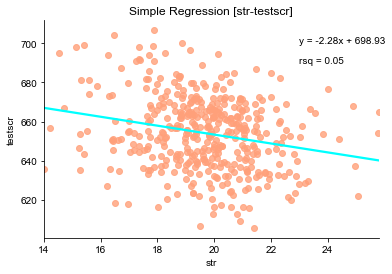

In [23]:
sns.regplot(x='str', y='testscr', data = schools,ci=False,line_kws = {'color':'cyan'},color='lightsalmon')
plt.xlabel('str')
plt.ylabel('testscr')
plt.title('Simple Regression [str-testscr]')
plt.annotate('y = {}x + {}'.format(b.round(2),a.round(2)),(23,700))
plt.annotate('rsq = {}'.format(rsq.round(2)),(23,690))
sns.set(rc={'figure.figsize':(12,8)},style='white')
sns.despine()

plt.show()

**4.3 Multiple Regression**

In [24]:
reg1 = ols('testscr ~ str', data=schools).fit(cov_type='HC3')
reg2 = ols("testscr ~ str + computer", data = schools).fit(cov_type = 'HC3')
reg3 = ols('testscr ~ str + expn_stu + enrl_tot',data=schools).fit(cov_type = 'HC3')

print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     8.993
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           8.78e-06
Time:                        02:55:33   Log-Likelihood:                -1819.2
No. Observations:                 420   AIC:                             3646.
Df Residuals:                     416   BIC:                             3663.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    667.4209     19.630     34.000      0.0

*Side note*: The caschools dataset may not have been the best dataset to use in order to demonstrate multiple regression since many of the variables are likely related to one another. There may be some issues with multicolinearity in the examples above, but the point of this article is only to demonstrate the python syntax.

*Viewing multiple models in one table - STARGAZER*

In [25]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [26]:
stargazer = Stargazer([reg1,reg2,reg3])
stargazer

In [27]:
HTML(stargazer.render_html())

*Interaction & Squared Terms*

In [28]:
schools['smallclass'] = schools['str'] < 20
reg1 = ols('testscr ~ comp_stu + comp_stu:smallclass', data=schools).fit(cov_type='HC3') #INTERACTION TERMS
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     19.46
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           8.33e-09
Time:                        02:55:34   Log-Likelihood:                -1812.9
No. Observations:                 420   AIC:                             3632.
Df Residuals:                     417   BIC:                             3644.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [29]:
reg1 = ols("testscr ~ computer + computer^2", data = schools).fit(cov_type = 'HC3') # SQUARED TERMS
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.798
Date:                Tue, 07 Feb 2023   Prob (F-statistic):             0.0621
Time:                        02:55:34   Log-Likelihood:                -1830.6
No. Observations:                 420   AIC:                             3667.
Df Residuals:                     417   BIC:                             3679.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      655.1335      1.119    585.708   

*The log-log model - Measuring elasticity*

In [30]:
reg3 = ols('np.log(testscr) ~ np.log(str)  + np.log(expn_stu) + np.log(avginc)',data=schools).fit(cov_type='HC3')
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log(testscr)   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     217.7
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           6.82e-85
Time:                        02:55:34   Log-Likelihood:                 1067.8
No. Observations:                 420   AIC:                            -2128.
Df Residuals:                     416   BIC:                            -2111.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.6955      0.128  

### 5- Regression Diagnostics

In [31]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import seaborn as sns
import statsmodels.api as sm

Here we use overall test scores as the outcome variable and student-teacher ratio, expenditure per student, and total enrolment as the input variables

In [32]:
reg = ols('testscr ~ str + expn_stu + enrl_tot', data=schools).fit(cov_type='HC3')
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     8.993
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           8.78e-06
Time:                        02:55:34   Log-Likelihood:                -1819.2
No. Observations:                 420   AIC:                             3646.
Df Residuals:                     416   BIC:                             3663.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    667.4209     19.630     34.000      0.0

In [33]:
JB, JBpv,skw,kurt = sm.stats.stattools.jarque_bera(reg.resid)
print(JB,JBpv,skw,kurt)

2.831897468133185 0.2426952509372759 -0.07931895155914565 2.6303288919066232


**5.1 Statistics**

**AUTOCORRELATION** - *The **Durbin-Watson** stat is used to test for autocorrelation. It is about 0.16. Usually, if the Durbin-Watson stat is between 1.5 and 2.5, it is a good sign that there is no autocorrelation. Autocorrelation is correlation between two successive observations of same variable.*

**DISTRIBUTION** - *The **Jarque-Bera** test statistic is significantly different than zero (and pvalue > 0.05). This may indicate that our data have normal distribution. Apart from it, we can have a clue about the kind of distribution we have taking a look to **skew** and **kurtosis**. Skew has relatively normal values, whilst kurtosis value shows that the distribution is quite sharp on its peak (different from 0 and positive).

**MULTICOLINEARITY** - *The condition number suggests that there may be issues with multicollinearity. Indeed, it is reasonable to assume that expenditure per student and total enrollment are related*

**HETEROKEDASTICITY - THE BREUSCH-PAGAN TEST**

In [34]:
test = sms.het_breuschpagan(reg.resid,reg.model.exog)
for stat,value in zip(labels,test[:2]):
    print('{}: {:.3f}'.format(stat,value))

LM Statistic: 17.161
LM-Test p-value: 0.001


The p-value is small enough to reject the null hypothesis that the variance of the residuals is not dependent on the values of the input variables. Thus heteroskedasticity is assumed to be present

**5.2 Visual Diagnostics**

*Simple Q-Q Plot*

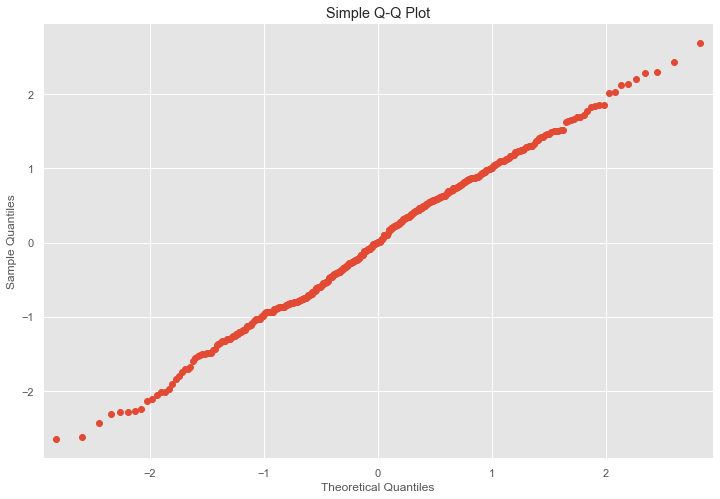

In [35]:
plt.style.use('ggplot')
a = sm.qqplot(reg.resid,fit=True)
plt.title('Simple Q-Q Plot')
plt.show()

The graph confirms the Jarque-Bera test. The points are approximately aligned, so residuals are normally distributed

*Normal Q-Q Plot*

C:\Users\aleex\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


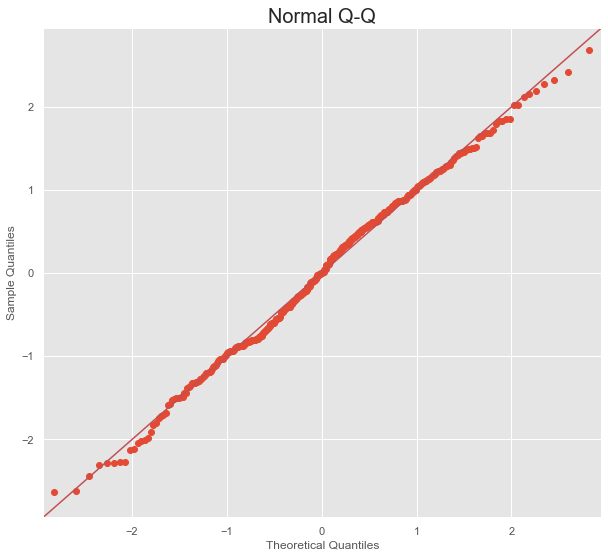

In [37]:
plt.rc('figure',figsize=(10,9))
plt.style.use('ggplot')

probplot = sm.ProbPlot(reg.get_influence().resid_studentized_internal,fit=True) #qqplot done based on studentized residuals
fig = probplot.qqplot(line='45',marker='o',color='black')
plt.title('Normal Q-Q',fontsize=20)
plt.show()

The data points follow the 45-degree line without deviating strongly, so we can assume that the residuals are normally distributed. If the residuals did not follow a normal distribution, you would see the data points spike away from the 45-degree line.

*Residuals vs Fitted*

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


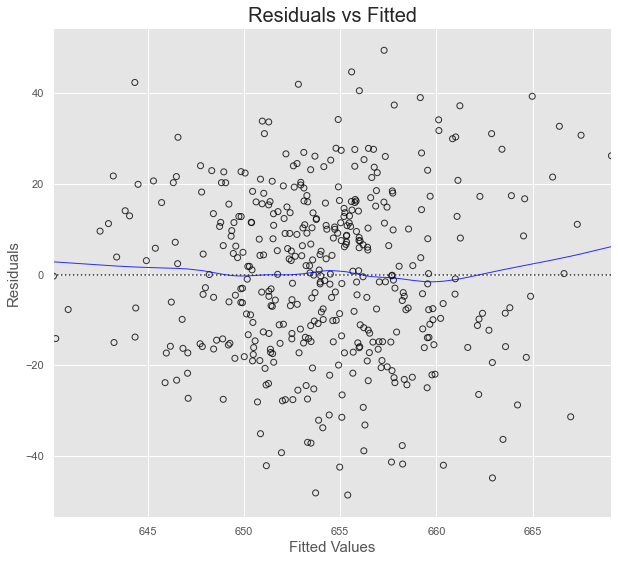

In [38]:
sns.residplot(reg.fittedvalues, 'testscr',data=schools, lowess=True,
             scatter_kws={'facecolors':'none', 'edgecolors':'black'}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})
plt.title('Residuals vs Fitted', fontsize=20)
plt.xlabel('Fitted Values', fontsize=15)
plt.ylabel('Residuals', fontsize=15)
plt.show()

The Residuals vs Fitted plot helps us to look for non-linear patterns not captured by the model. The lowess regression line does not appear to follow any particular pattern, and the data points seem to be spread fairly evenly across the dotted line. This is a good sign that there are no non-linear relationships between the outcome and predictors.

*Scale-Location Plot*

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


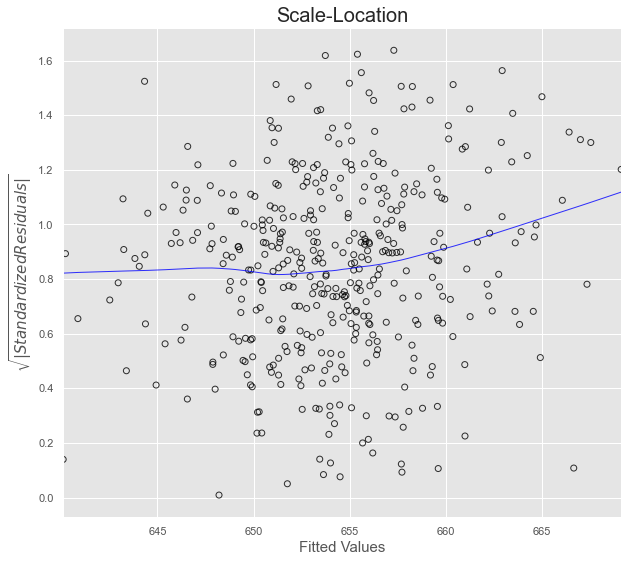

In [39]:
sns.regplot(reg.fittedvalues,np.sqrt(np.abs(reg.get_influence().resid_studentized_internal)),
           scatter=True,ci=False,lowess=True,
           line_kws={'color':'blue','lw':1,'alpha':0.8},
           scatter_kws={'facecolors':'none','edgecolors':'black'})
plt.title('Scale-Location', fontsize=20)
plt.xlabel('Fitted Values', fontsize=15)
plt.ylabel('$\sqrt{|Standardized Residuals|}$', fontsize=15)
plt.show()

The scale location plot is another great way to check if heteroskedasticity is present. The plot above seems to confirm the results from the Breusch-Pagan test we ran earlier. Notice that between x=650 and x=660 the data points are bunched together, whereas outside of that x-range the data points are spread out. If heteroskedasticity were not present we would see a “cloud pattern” where the data points are more bunched together (or at least evenly spread).